# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +30.28633207626                   -1.39    6.27s
  2   +20.18315767954        1.00       -0.88   11.0ms
  3   +15.76023760724        0.65       -0.42   10.9ms
  4   +11.07672253920        0.67       -0.20   11.0ms
  5   +9.420324114282        0.22       -0.56   11.0ms
  6   +8.907092445186       -0.29       -0.86   8.84ms
  7   +8.631940616389       -0.56       -0.94   8.70ms
  8   +8.390477945090       -0.62       -0.92   8.76ms
  9   +8.243314648826       -0.83       -0.93   8.79ms
 10   +8.193600041456       -1.30       -1.08   6.68ms
 11   +8.177961592338       -1.81       -1.03   6.69ms
 12   +8.147495969777       -1.52       -1.03   6.74ms
 13   +8.079863523883       -1.17       -1.07   6.76ms
 14   +8.020349245896       -1.23       -1.12   6.70ms
 15   +7.968669112775       -1.29       -1.09   6.69ms
 16   +7.935592323435       -1.48       -1.10   6.66ms
 17   +7.90

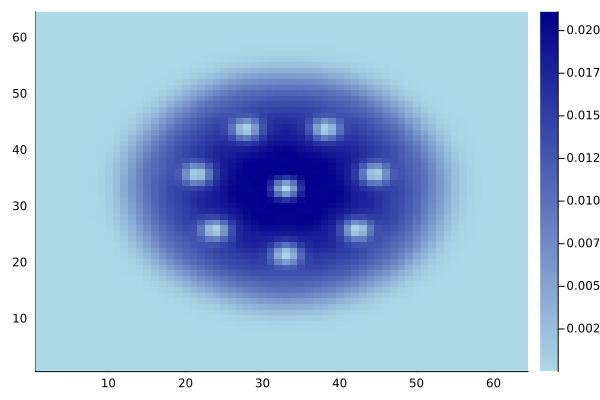

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)